In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/explicitimplicitv5/explicit-implicit-v5.csv
/kaggle/input/entrp-srch/ENTRP-SRCH-v12.txt


**This script performs a correlation between two implicit (click-though data) and explicit (human relevance judgement) feedback for an Enterprise Search (ES) service that uses Learning to Rank (LTR)**

In [2]:
# Much of the code in this notebook inspired by 
# https://towardsdatascience.com/compare-multiple-frequency-distributions-to-extract-valuable-information-from-a-dataset-10cba801f07b
# 

In [3]:
#!pip3 install -U datapane >/dev/null 2>&1

In [4]:
#!pip3 install -U jinja2

In [5]:
import seaborn as sns
import altair as alt 
import pandas as pd


exim0=pd.read_csv("/kaggle/input/explicitimplicitv5/explicit-implicit-v5.csv")

exim=pd.read_csv("/kaggle/input/entrp-srch/ENTRP-SRCH-v12.txt",sep='\s+', header=None, names=["HUMAN", "QID", "BM25", "RECENCY", "CONTACT", "ABOUT", "RAWHITS","URL-LEN","LINKRANK","CTR-6"])

In [6]:
exim['CTR-6'] = exim['CTR-6'].str[2:]

In [7]:
#exim["HUMAN"] = pd.to_numeric(exim["HUMAN"])
# convert just columns "a" and "b"
exim[["HUMAN", "CTR-6"]] = exim[["HUMAN", "CTR-6"]].apply(pd.to_numeric)


In [8]:
exim.head(5)

,HUMAN,QID,BM25,RECENCY,CONTACT,ABOUT,RAWHITS,URL-LEN,LINKRANK,CTR-6
0,5,qid:1,1:7.621721,2:0.01871686,3:0.0,4:0.0,5:34.0,6:6.0,7:1.080049,0.19
1,3,qid:1,1:7.60648,2:0.01871686,3:0.0,4:0.0,5:22.0,6:8.0,7:0.42990547,0.04
2,4,qid:1,1:5.8517275,2:0.01871686,3:0.0,4:0.0,5:22.0,6:7.0,7:0.4299054,0.03
3,5,qid:1,1:8.211309,2:0.01871686,3:0.0,4:1.0,5:4.0,6:7.0,7:0.42990547,0.09
4,3,qid:1,1:4.7186995,2:0.01871686,3:0.0,4:0.0,5:22.0,6:9.0,7:0.42990544,0.00


In [9]:
# eclude those documents that have no (NULL) CTR score 
exim = exim[exim["CTR-6"] != 0.00]

In [10]:
exim.describe

<bound method NDFrame.describe of       HUMAN     QID         BM25       RECENCY CONTACT  ABOUT RAWHITS URL-LEN  \
0         5   qid:1   1:7.621721  2:0.01871686   3:0.0  4:0.0  5:34.0   6:6.0   
1         3   qid:1    1:7.60648  2:0.01871686   3:0.0  4:0.0  5:22.0   6:8.0   
2         4   qid:1  1:5.8517275  2:0.01871686   3:0.0  4:0.0  5:22.0   6:7.0   
3         5   qid:1   1:8.211309  2:0.01871686   3:0.0  4:1.0   5:4.0   6:7.0   
5         5   qid:1    1:7.60648  2:0.01871686   3:0.0  4:0.0   5:4.0   6:7.0   
...     ...     ...          ...           ...     ...    ...     ...     ...   
2367      3  qid:20   1:5.666758  2:0.01871686   3:0.0  4:0.0   5:6.0   6:8.0   
2375      2  qid:20  1:4.3778353  2:0.01871686   3:0.0  4:0.0  5:10.0   6:9.0   
2377      2  qid:20  1:3.2534223  2:0.01871686   3:0.0  4:0.0  5:14.0   6:9.0   
2382      2  qid:20  1:3.8906693  2:0.01871686   3:0.0  4:0.0  5:10.0   6:9.0   
2477      1  qid:20  1:5.9128585  2:0.01871686   3:0.0  4:0.0   5:2.0  6:15

In [11]:
#exim.describe

In [12]:
#exim.info

In [13]:
import seaborn as sns

import matplotlib.pyplot as plt


In [14]:
#sns.stripplot(x = 'Pos', y = 'Height', data = wnba)
sns.set(rc={'figure.figsize':(15,10)})
sns.set(font_scale=2)

#sns.stripplot(x = 'HUMAN', y = 'CLICK-THRU-6', data = exim).set(title='Strip Plot of raw Click-through versus human relevance judgements',xlabel='human relevance judgements',ylabel='raw Click-through 6 months')

[Text(0.5, 1.0, 'Strip Plot of CTR versus Human relevance judgements'),
 Text(0.5, 0, 'Human relevance judgements'),
 Text(0, 0.5, 'CTR %')]

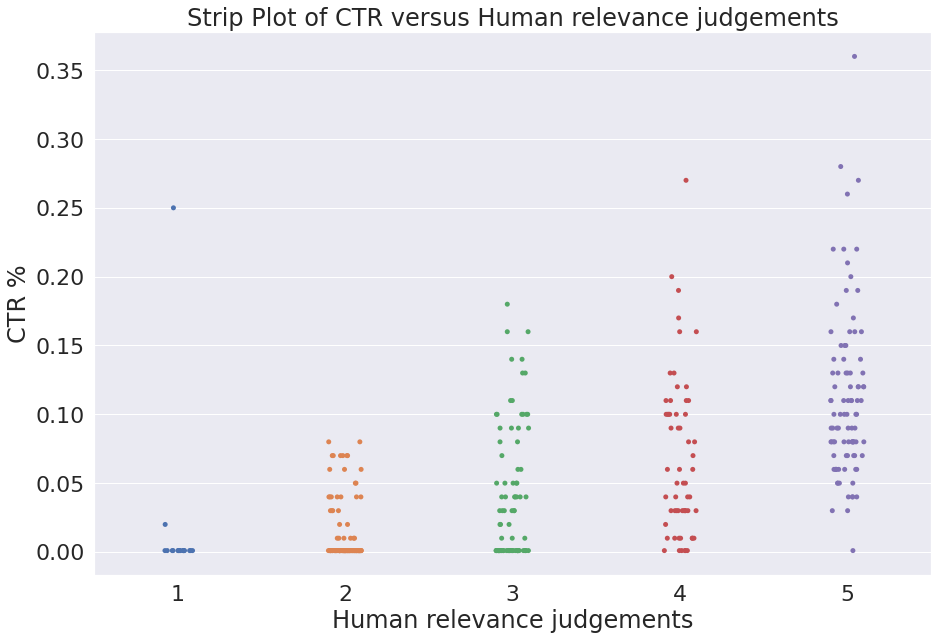

In [15]:
sns.set(rc={'figure.figsize':(15,10)})
sns.set(font_scale=2)

sns.stripplot(x = 'HUMAN', y = 'CTR-6', data = exim).set(title='Strip Plot of CTR versus Human relevance judgements',xlabel='Human relevance judgements',ylabel='CTR %')

In [16]:
#sns.boxplot(x = 'Pos', y = 'Height', data = wnba)
#sns.boxplot(x = 'HUMAN', y = 'CLICK-THRU-6', data = exim)

In [17]:
#sns.set(rc={'figure.figsize':(11.7,8.27)})
#sns.boxplot(x = 'Pos', y = 'Height', data = wnba, whis=4)
#sns.boxplot(x = 'HUMAN', y = 'CLICK-THRU-6', data = exim, whis=4)

[Text(0.5, 1.0, 'Box Plot of CTR versus Human relevance judgements'),
 Text(0.5, 0, 'Human relevance judgements'),
 Text(0, 0.5, 'CTR %')]

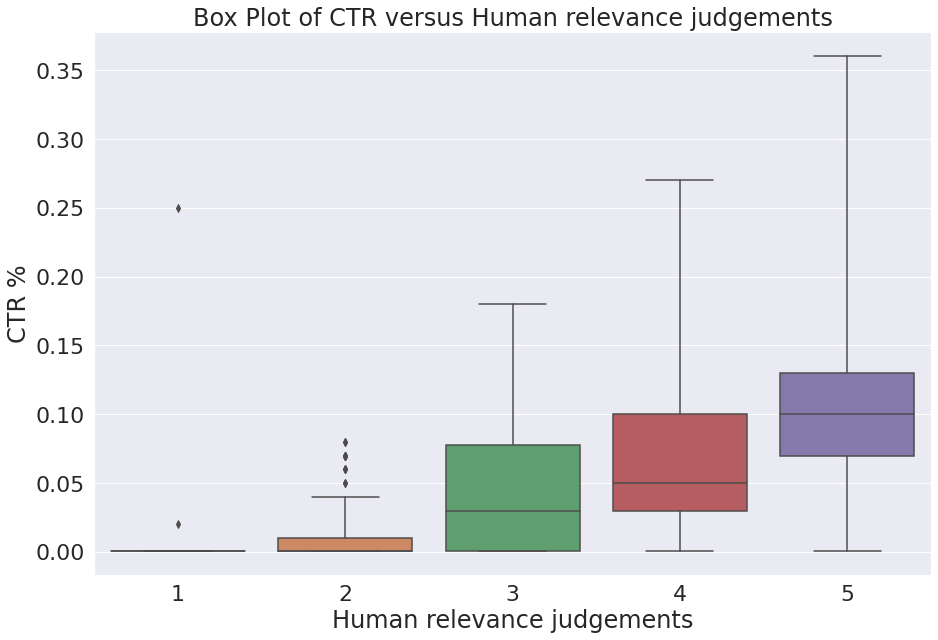

In [18]:
sns.boxplot(x = 'HUMAN', y = 'CTR-6', data = exim, whis=4).set(title='Box Plot of CTR versus Human relevance judgements',xlabel='Human relevance judgements',ylabel='CTR %')

In [19]:
!pip3 install scipy

In [20]:
from scipy.stats import ttest_rel

In [21]:
#exim.rename(columns={'HUMAN':'','CTR-6:''})

In [22]:

# calculate the Pearson's correlation between two variables
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr
from scipy.stats import spearmanr
# seed random number generator
seed(1)
# prepare data

In [23]:
#data1 = exim['HUMAN']
#data2 = exim['CLICK-THRU-6']#

#data1 = data1.dropna()
#data2 = data2.dropna()

# calculate Pearson's correlation
#corr, _ = pearsonr(data1, data2)
#print('Pearsons correlation human v raw click-through: %.3f' % corr)

In [24]:
data1 = exim['HUMAN']
data2 = exim['CTR-6']

#data1 = data1.dropna()
#data2 = data2.dropna()

# calculate Pearson's correlation
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation human v CTR : %.3f' % corr)

Pearsons correlation human v CTR : 0.621


In [25]:
data1 = exim['HUMAN']
data2 = exim['CTR-6']

#data1 = data1.dropna()
#data2 = data2.dropna()

from scipy.stats import spearmanr
corr, _ = spearmanr(data1, data2)
print('Spearmans correlation:  human v click-through-rate: %.3f' % corr)

Spearmans correlation:  human v click-through-rate: 0.704


In [26]:
# calculate spearman's correlation
coef, p = spearmanr(data1, data2)
print('Spearmans correlation coefficient: %.3f' % coef)
print ('p-value',p)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)

Spearmans correlation coefficient: 0.704
p-value 2.6240043152210554e-57
Samples are correlated (reject H0) p=0.000


In [27]:
#another way to report the results from the t-test by creating a violin plot:
#sns.violinplot(x='HUMAN', y='CLICK-THRU-6', bw=10, data=exim)

<AxesSubplot:xlabel='HUMAN', ylabel='CTR-6'>

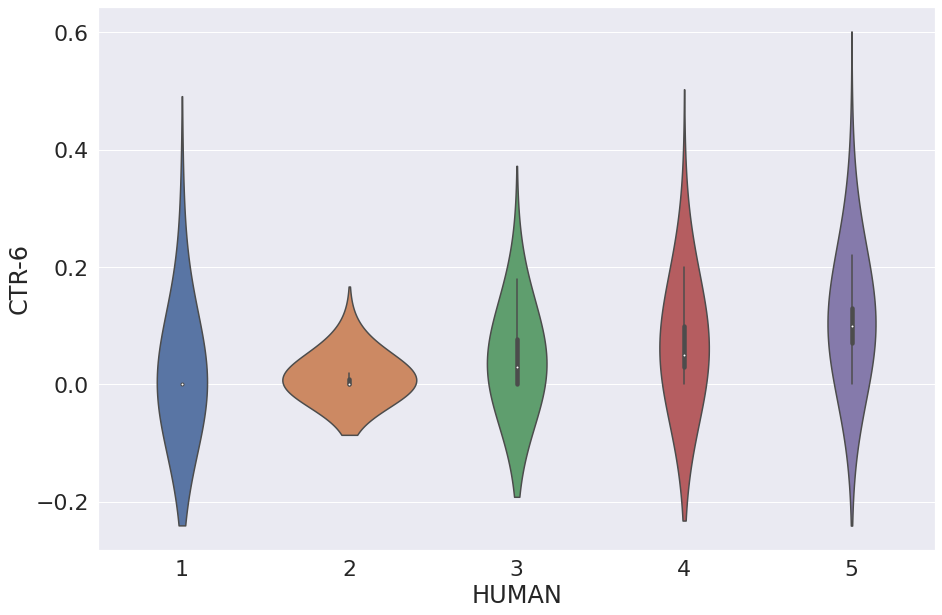

In [28]:
#another way to report the results from the t-test by creating a violin plot:
sns.violinplot(x='HUMAN', y='CTR-6', bw=2, data=exim)